<a href="https://colab.research.google.com/github/Anshuldogra001/ML_Projects/blob/main/Synthetic_Financial_Datasets_For_Fraud_Detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Name - Abhinav Dogra
##Model_Name - Synthetic Financial Datasets For Fraud Detection
 


##Import libraries
Important libraries are <>
* numpy(used for linear algebra)
* pandas(for reading and processing csv file data)
* Matplotlib and seaborn(for data visualization)

###Note: Used drive library to connect the data set from the google drive.
Dataset link here: https://drive.google.com/file/d/106TcVcJpBID0ZtGPuFgwslHuXay8sXR4/view?usp=sharing

##Let's start!!!!



In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import datasets
from google.colab import drive

drive.mount('/content/gdrive/', force_remount=True)

Mounted at /content/gdrive/


here we can also put path of uploded csv(in Jupyter of colab) in place of "/content/gdrive/MyDrive/PS_20174392719_1491204439457_log.csv"

In [ ]:
import pandas as pd

df = pd.read_csv("/content/gdrive/MyDrive/PS_20174392719_1491204439457_log.csv")

it is to ignore the normal warnings messeges which may came during proccessing.

In [ ]:
import warnings
warnings.filterwarnings('ignore')

##Data Cleaning


In [ ]:
df.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 11 columns):
 #   Column          Dtype  
---  ------          -----  
 0   step            int64  
 1   type            object 
 2   amount          float64
 3   nameOrig        object 
 4   oldbalanceOrg   float64
 5   newbalanceOrig  float64
 6   nameDest        object 
 7   oldbalanceDest  float64
 8   newbalanceDest  float64
 9   isFraud         int64  
 10  isFlaggedFraud  int64  
dtypes: float64(5), int64(3), object(3)
memory usage: 534.0+ MB


To check for any kind of missing values or null values in the data set.

In [ ]:
df.isnull().sum()

step              0
type              0
amount            0
nameOrig          0
oldbalanceOrg     0
newbalanceOrig    0
nameDest          0
oldbalanceDest    0
newbalanceDest    0
isFraud           0
isFlaggedFraud    0
dtype: int64

Hence, found no null values in the dataset

To chek for any duplicate in the dataset we use the below code.

In [ ]:
df.duplicated().sum()

0

Hence there are no duplicates.

In [ ]:
df.describe()

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
count,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06
mean,2.433972e+02,1.798619e+05,8.338831e+05,8.551137e+05,1.100702e+06,1.224996e+06,1.290820e-03,2.514687e-06
std,1.423320e+02,6.038582e+05,2.888243e+06,2.924049e+06,3.399180e+06,3.674129e+06,3.590480e-02,1.585775e-03
min,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,1.560000e+02,1.338957e+04,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,2.390000e+02,7.487194e+04,1.420800e+04,0.000000e+00,1.327057e+05,2.146614e+05,0.000000e+00,0.000000e+00
75%,3.350000e+02,2.087215e+05,1.073152e+05,1.442584e+05,9.430367e+05,1.111909e+06,0.000000e+00,0.000000e+00
max,7.430000e+02,9.244552e+07,5.958504e+07,4.958504e+07,3.560159e+08,3.561793e+08,1.000000e+00,1.000000e+00


This is to check the correlation in the data in tha dataset

In [ ]:
df.corr()

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
step,1.000000,0.022373,-0.010058,-0.010299,0.027665,0.025888,0.031578,0.003277
amount,0.022373,1.000000,-0.002762,-0.007861,0.294137,0.459304,0.076688,0.012295
oldbalanceOrg,-0.010058,-0.002762,1.000000,0.998803,0.066243,0.042029,0.010154,0.003835
newbalanceOrig,-0.010299,-0.007861,0.998803,1.000000,0.067812,0.041837,-0.008148,0.003776
oldbalanceDest,0.027665,0.294137,0.066243,0.067812,1.000000,0.976569,-0.005885,-0.000513
newbalanceDest,0.025888,0.459304,0.042029,0.041837,0.976569,1.000000,0.000535,-0.000529
isFraud,0.031578,0.076688,0.010154,-0.008148,-0.005885,0.000535,1.000000,0.044109
isFlaggedFraud,0.003277,0.012295,0.003835,0.003776,-0.000513,-0.000529,0.044109,1.000000


In [ ]:
df.cov()

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
step,2.025839e+04,1.922922e+06,-4.134891e+06,-4.286311e+06,1.338483e+07,1.353812e+07,0.161374,0.000740
amount,1.922922e+06,3.646448e+11,-4.818002e+09,-1.388012e+10,6.037533e+11,1.019037e+12,1662.713045,11.773104
oldbalanceOrg,-4.134891e+06,-4.818002e+09,8.341946e+12,8.435251e+12,6.503462e+11,4.459983e+11,1053.031482,17.562544
newbalanceOrig,-4.286311e+06,-1.388012e+10,8.435251e+12,8.550060e+12,6.740036e+11,4.494741e+11,-855.454000,17.509156
oldbalanceDest,1.338483e+07,6.037533e+11,6.503462e+11,6.740036e+11,1.155443e+13,1.219639e+13,-718.279794,-2.767921
newbalanceDest,1.353812e+07,1.019037e+12,4.459983e+11,4.494741e+11,1.219639e+13,1.349922e+13,70.622371,-3.080483
isFraud,1.613740e-01,1.662713e+03,1.053031e+03,-8.554540e+02,-7.182798e+02,7.062237e+01,0.001289,0.000003
isFlaggedFraud,7.397338e-04,1.177310e+01,1.756254e+01,1.750916e+01,-2.767921e+00,-3.080483e+00,0.000003,0.000003


##Data Visualization

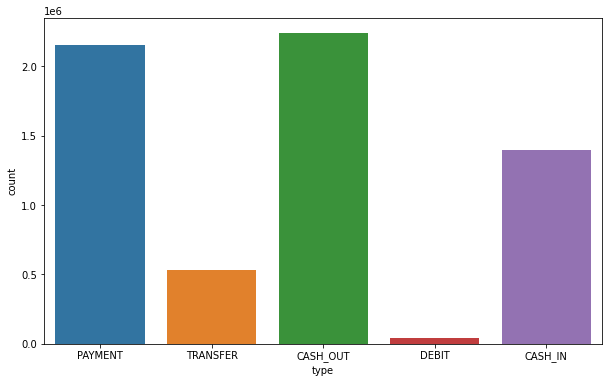

In [ ]:
plt.figure(figsize=(10,6))
sns.countplot(x='type', data=df)
plt.show()

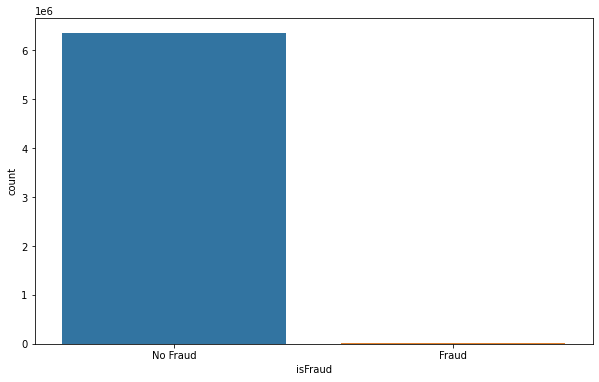

In [ ]:
plt.figure(figsize=(10,6))
sns.countplot(x='isFraud', data=df)
plt.show()

checking correlation of other dataset with the 'isFraud' column.

In [ ]:
correlation=df.corr()
correlation['isFraud']

step              0.031578
amount            0.076688
oldbalanceOrg     0.010154
newbalanceOrig   -0.008148
oldbalanceDest   -0.005885
newbalanceDest    0.000535
isFraud           1.000000
isFlaggedFraud    0.044109
Name: isFraud, dtype: float64

Before the ML mode preparation we must check the required columns contain numerical values only.

In [ ]:
df["type"] = df["type"].map({"CASH_OUT": 1, "PAYMENT": 2, 
                                 "CASH_IN": 3, "TRANSFER": 4,
                                 "DEBIT": 5})
df["isFraud"] = df["isFraud"].map({0: "No Fraud", 1: "Fraud"})
print(df.head())

   step  type    amount     nameOrig  oldbalanceOrg  newbalanceOrig  \
0     1     2   9839.64  C1231006815       170136.0       160296.36   
1     1     2   1864.28  C1666544295        21249.0        19384.72   
2     1     4    181.00  C1305486145          181.0            0.00   
3     1     1    181.00   C840083671          181.0            0.00   
4     1     2  11668.14  C2048537720        41554.0        29885.86   

      nameDest  oldbalanceDest  newbalanceDest   isFraud  isFlaggedFraud  
0  M1979787155             0.0             0.0  No Fraud               0  
1  M2044282225             0.0             0.0  No Fraud               0  
2   C553264065             0.0             0.0     Fraud               0  
3    C38997010         21182.0             0.0     Fraud               0  
4  M1230701703             0.0             0.0  No Fraud               0  


Spliting the values for training and testing.

In [ ]:
from sklearn.model_selection import train_test_split

From the correlation model we can tell that 'type','amount','oldbalanceOrg','newbalanceOrig' are the columns which link to the isFraud column.

In [ ]:
x=np.array(df[['type','amount','oldbalanceOrg','newbalanceOrig']])
y=np.array(df[['isFraud']])

In [ ]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.1,random_state=1)

In [ ]:
x_train[:10]

array([[2.00000000e+00, 3.78938900e+04, 4.59458000e+05, 4.21564110e+05],
       [2.00000000e+00, 6.84516000e+03, 2.16810000e+04, 1.48358400e+04],
       [1.00000000e+00, 2.28634040e+05, 1.14680000e+04, 0.00000000e+00],
       [1.00000000e+00, 1.19743660e+05, 0.00000000e+00, 0.00000000e+00],
       [3.00000000e+00, 2.47921740e+05, 8.33161408e+06, 8.57953582e+06],
       [3.00000000e+00, 3.42811000e+04, 8.13348089e+06, 8.16776199e+06],
       [1.00000000e+00, 4.91583100e+04, 0.00000000e+00, 0.00000000e+00],
       [2.00000000e+00, 7.48125000e+03, 6.34000000e+02, 0.00000000e+00],
       [2.00000000e+00, 9.01838000e+03, 2.83780190e+05, 2.74761810e+05],
       [1.00000000e+00, 7.38578800e+04, 0.00000000e+00, 0.00000000e+00]])

###Different Classification Models
* **Decision tree**

Decision Tree is a Supervised learning technique that can be used for both classification and Regression problems, but mostly it is preferred for solving Classification problems. It is a tree-structured classifier, where internal nodes represent the features of a dataset, branches represent the decision rules and each leaf node represents the outcome.
* Root Node: Root node is from where the decision tree starts. It represents the entire dataset, which further gets divided into two or more homogeneous sets.
* Leaf Node: Leaf nodes are the final output node, and the tree cannot be segregated further after getting a leaf node.
* Splitting: Splitting is the process of dividing the decision node/root node into sub-nodes according to the given conditions.
* Branch/Sub Tree: A tree formed by splitting the tree.
* Pruning: Pruning is the process of removing the unwanted branches from the tree.
* Parent/Child node: The root node of the tree is called the parent node, and other nodes are called the child nodes


###Note: Decsion tree accuracy is 84.23 and F1-score is 0.6308

In [ ]:
from sklearn.tree import DecisionTreeClassifier
model=DecisionTreeClassifier()
model.fit(x_train,y_train)


DecisionTreeClassifier()

In [ ]:
model.score(x_test,y_test)

0.9997312427899199

###To check if the model is working properly values are given whose output according to the dataset is 'Fraud'.

In [ ]:
features = np.array([[4, 181.00, 181.00, 0.0]])
print(model.predict(features))

['Fraud']


* Naive Bayes

Naive Bayes algorithm based on Bayes’ theorem with the assumption of independence between every pair of features. Naive Bayes classifiers work well in many real-world situations such as document classification and spam filtering.
####Disadvantages: Naive Bayes is is known to be a bad estimator.

###Note: Decsion tree accuracy is 80.11 and F1-score is 0.6005

In [ ]:
from sklearn.naive_bayes import GaussianNB
nb=GaussianNB()
nb.fit(x_train,y_train)

GaussianNB()

In [ ]:
nb.score(x_test,y_test)

0.9945069798290641

In [ ]:
features = np.array([[4, 181.00, 181.00, 0.0]])
print(nb.predict(features))

['No Fraud']


* K-Nearest Neighbours

Neighbours based classification is a type of lazy learning as it does not attempt to construct a general internal model, but simply stores instances of the training data. Classification is computed from a simple majority vote of the k nearest neighbours of each point.

####Advantages: This algorithm is simple to implement, robust to noisy training data, and effective if training data is large.

###Note: Decsion tree accuracy is 83.56 and F1-score is 0.5924

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=4)
knn.fit(x_train,y_train)

KNeighborsClassifier(n_neighbors=4)

In [ ]:
knn.score(x_test,y_test)

0.9995410695593954

In [ ]:
features = np.array([[4, 181.00, 181.00, 0.0]])
print(knn.predict(features))

['Fraud']


We concluded that,
* K-Nearest Neighbours
* Decision Tree

are the best approch for the given dataset for classification.

####key factors that predict fraudulent customer?
* type of transaction 
* amount transacted
* oldbalanceOrg
* newbalanceOrig

These factors make sense because these have nearest correlation with the isFraud column.
####preventions that can be adopted while company update its infrastructure are<>
* More security during Payment and cash_out as these are more vulnerable.
* A confirmation messege to account holder for a bigger transaction.
* Checking for irregularity in the transaction pattern of on user.

####These can be useful but as the online payments or the world go near to online mode then complexity of security grid also increases and more vulnerability will be exposed and as the vulnerabilities are exposed the attacks also increases and require time to time new management and security ways increases.  